In [61]:
import dataset
import numpy as np
from Preprocessing import *
import os
from matplotlib import pyplot as plt
from cv2 import cv2 as cv

In [15]:
XTrain = np.copy(dataset.X_train_input)
yTrain = np.copy(dataset.X_train_target)
XTest = np.copy(dataset.X)

In [119]:
for i, j in enumerate(XTrain):
    print(np.max(j), i, sep = "\t")

-0.4689073	0
-0.4689073	1
-0.4689073	2
15.760992	3
25.736814	4
26.300158	5
26.11986	6
26.199656	7
26.556625	8
26.316069	9
26.421955	10
25.647139	11
25.915882	12
25.912489	13
25.510616	14
26.4545	15
26.478214	16
26.36228	17
26.287842	18
26.82348	19
26.945408	20
27.231216	21
26.91832	22
26.802387	23
26.530874	24
27.049934	25
27.124844	26
26.772055	27
27.752474	28
26.60511	29
27.450603	30
27.530745	31
28.487705	32
28.223349	33
28.736706	34
27.936262	35
27.717459	36
28.031775	37
29.537498	38
31.898632	39
32.42854	40
33.51693	41
37.141026	42
37.197277	43
34.687756	44
35.523857	45
31.328123	46
28.656849	47
28.782204	48
29.562708	49
29.365479	50
29.755436	51
30.890984	52
33.148933	53
30.601233	54
33.11009	55
38.435345	56
34.22162	57
30.510765	58
30.891144	59
30.505695	60
29.808142	61
29.842726	62
29.884361	63
30.846405	64
31.368961	65
32.23625	66
30.756182	67
30.668015	68
31.948496	69
31.033838	70
29.440855	71
29.07518	72
29.539652	73
29.545374	74
29.941809	75
29.471037	76
29.371338	77
29.691

25.393864	1174
24.951408	1175
25.352411	1176
24.91697	1177
24.890888	1178
24.399315	1179
24.66655	1180
24.2725	1181
23.710201	1182
23.360733	1183
23.427494	1184
23.297203	1185
22.74302	1186
22.715199	1187
22.55245	1188
22.41869	1189
22.01999	1190
22.078869	1191
22.22364	1192
21.10988	1193
21.180843	1194
20.918125	1195
21.115759	1196
20.698696	1197
20.44079	1198
20.237434	1199
20.025251	1200
19.927643	1201
19.994505	1202
19.375303	1203
19.312696	1204
18.958809	1205
18.993378	1206
18.421888	1207
18.38529	1208
18.20857	1209
18.297401	1210
17.776508	1211
17.469898	1212
17.025457	1213
16.127613	1214
15.618567	1215
14.751161	1216
12.876415	1217
12.0869665	1218
11.625562	1219
5.814503	1220
-0.4689073	1221
-0.4689073	1222
-0.4689073	1223
-0.4689073	1224
-0.4689073	1225
-0.4689073	1226
4.515033	1227
4.5715904	1228
4.459862	1229
4.679804	1230
4.711669	1231
4.630234	1232
5.3785853	1233
4.6651945	1234
4.534581	1235
4.580216	1236
4.626551	1237
6.0846014	1238
5.491888	1239
4.524924	1240
4.6137667	12

7.4120207	1732
7.369528	1733
7.4892426	1734
6.593772	1735
5.822969	1736
5.4913416	1737
5.6284647	1738
5.86604	1739
5.6250463	1740
5.061521	1741
4.507786	1742
4.539648	1743
4.8441343	1744
5.0804935	1745
4.945224	1746
5.0161033	1747
5.096743	1748
5.178774	1749
5.259414	1750
5.2093616	1751
5.10048	1752
4.97671	1753
4.914231	1754
4.920574	1755
4.936621	1756
4.88457	1757
4.8734093	1758
4.8682437	1759
4.907453	1760
4.977434	1761
4.933407	1762
4.8194265	1763
4.6863875	1764
4.580924	1765
4.5424	1766
4.5048604	1767
4.4795775	1768
4.5347767	1769
4.5049086	1770
4.477408	1771
4.4147034	1772
4.46846	1773
4.5990915	1774
4.7052884	1775
4.665605	1776
4.621524	1777
4.699785	1778
4.696999	1779
4.7405615	1780
4.651569	1781
4.4873915	1782
4.4293127	1783
4.143148	1784
3.9450598	1785
3.9645615	1786
3.9867647	1787
4.2794037	1788
4.3306866	1789
4.280337	1790
4.022089	1791
4.003778	1792
4.2315516	1793
4.1358523	1794
4.2249956	1795
4.03471	1796
4.115926	1797
4.1556144	1798
4.1505733	1799
4.1818604	1800
4.217964

In [126]:
def NormalizeImageSet(XSet, ySet):
    for image in XSet:
        
        # Check bins
        bin = 32
        if np.max(image) > 32:
            # 32 bin
            bin = 64
        image[image < 0] = 0
        image[image > bin] = bin
        # Normalize
        image /= bin
    return XSet, ySet

In [127]:
XTrain, yTrain = NormalizeImageSet(XTrain, yTrain)

In [128]:
x = np.copy(XTrain[871])
y = np.copy(yTrain[871])[:, :, np.newaxis]
x1,x2,x3,x4, y = DistortImages((x[:, : ,0, np.newaxis], x[:, :, 1, np.newaxis], x[:, :, 2, np.newaxis], x[:, :, 3, np.newaxis], y))

In [132]:
np.max(x)

0.7129512

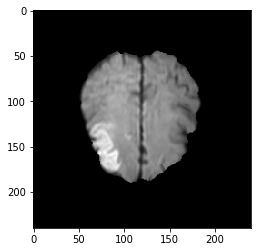

In [137]:
plt.imshow(x[:,  :, 0] * 255, cmap = "gray")

In [140]:
np.max(x)

0.7129512

In [141]:
VisualizeImage(x, y, intensity = 255)